# Computer vision

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.vision import * 
from fastai import *
from fastai.docs import *

The `vision` module of the fastai library contains all the necessary functions to define a Dataset and train a model for computer vision tasks. It contains four different submodules to reach that goal:
- `vision.image` contains the basic definition of an `Image` object and all the functions that are used behind the scenes to apply transformations to such an object,
- `vision.transform` contains all the transforms we can use for data augmentation,
- `vision.data` contains the definition of `ImageDataset` as well as the utility function to easily build a `DataBunch` for Computer Vision problems.
- `vision.learner` lets you build and fine-tune models with a pretrained CNN backbone or train a randomly initialized model from scratch.

Each of the four module links above includes a quick overview and examples of the functionality of that module, as well as complete API documentation. Below, we'll provide a walk-thru of end to end computer vision model training with the most commonly used functionality.

## Minimal training example

First, create a data folder containing a MNIST subset in `data/mnist_sample` (which we're calling `MNIST_PATH`), using this little documentation helper that will download it for you:

In [ ]:
untar_data(MNIST_PATH)
MNIST_PATH

PosixPath('../data/mnist_sample')

Since this contains standard `train` and `valid` folders, and each contains one folder per class, you can create a `DataBunch` in a single line:

In [ ]:
data = image_data_from_folder(MNIST_PATH)

You load a pretrained model ready for fine tuning (`tvm` is the namespace for `torchvision.models`):

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy)

And now you're ready to train!

In [ ]:
learn.fit(1)

Total time: 00:09
epoch  train loss  valid loss  accuracy
0      0.087998    0.047409    0.985280  (00:09)



Let's look briefly at each of the `vision` submodules.

## Getting the data

The most important piece of `vision.data` is the `ImageDataset`. If you've got labels as subfolders, then you can just say:

In [ ]:
ds = ImageDataset.from_folder(MNIST_PATH/'train')

## Images

That brings us to `vision.image`, which defines the `Image` class. Our dataset will return `Image` objects when we index it. Images automatically display in notebooks:

In [ ]:
img,label = ds[0]
img

You can change the way they're displayed:

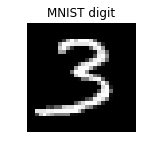

In [ ]:
img.show(figsize=(2,2), title='MNIST digit')

And you can transform them in various ways:

In [ ]:
img.rotate(35)

## Data augmentation

`vision.transforms` lets us do data augmentation. Simplest is to choose from a standard set of transforms, where the defaults are designed for photos:

In [ ]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip: bool = True, flip_vert: bool = False, max_rotate: float = 10.0, max_zoom: float = 1.1, max_lighting: float = 0.2, max_warp: float = 0.2, p_affine: float = 0.75, p_lighting: float = 0.75, xtra_tfms: float = None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



...or create the exact list you want:

In [ ]:
tfms = [rotate(degrees=(-20,20)), symmetric_warp(magnitude=(-0.3,0.3))]

You can apply these to an existing dataset:

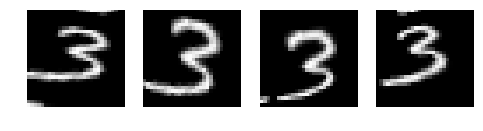

In [ ]:
tds = DatasetTfm(ds, tfms)

fig,axes = plt.subplots(1,4,figsize=(8,2))
for ax in axes: apply_tfms(tfms, ds[0][0]).show(ax=ax)

You can create a `DataBunch` with your transformed training and validation data loaders in a single step, passing in a tuple of *(train_tfms, valid_tfms)*:

In [ ]:
data = image_data_from_folder(MNIST_PATH, ds_tfms=(tfms, []))

## Training and interpretation

Now you're ready to train a model. To create a model, simply pass your `DataBunch` and a model creation function (such as one provided by `tvm`: `torchvision.models`) to `ConvLearner`, and call `fit`:

In [ ]:
learn = ConvLearner(data, tvm.resnet18, metrics=accuracy)
learn.fit(1)

Total time: 00:09
epoch  train loss  valid loss  accuracy
0      0.127079    0.064693    0.977920  (00:09)



Now we can take a look at the most incorrect images, and also the classification matrix.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

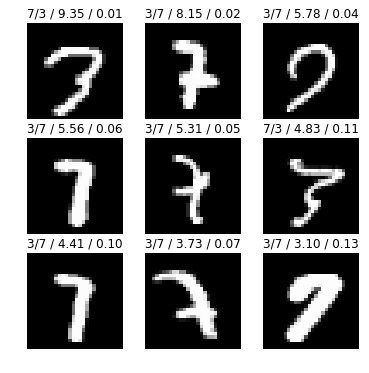

In [ ]:
interp.plot_top_losses(9, figsize=(6,6))

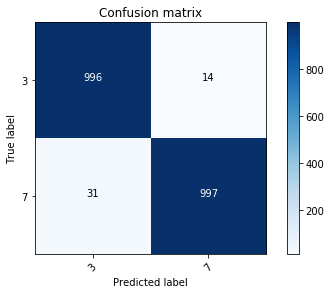

In [ ]:
interp.plot_confusion_matrix()